In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\Sayali\Downloads\Online Retail (1).xlsx')
df.shape

(541909, 10)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8,Unnamed: 9
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Unnamed: 8   0 non-null       float64       
 9   Unnamed: 9   1 non-null       float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 41.3+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
Unnamed: 9     541908
dtype: int64

In [6]:
#deleted rows whos unit price was 0
df = df[df['UnitPrice'] != 0]

#deleting last two columns

df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)

In [7]:
df.shape

(539394, 8)

In [8]:
# reset used for reset the index of the DataFrame after removing rows to ensure that it is continuous and starts from zero.
df.reset_index(drop=True, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539394 entries, 0 to 539393
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539394 non-null  object        
 1   StockCode    539394 non-null  object        
 2   Description  539394 non-null  object        
 3   Quantity     539394 non-null  int64         
 4   InvoiceDate  539394 non-null  datetime64[ns]
 5   UnitPrice    539394 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      539394 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.9+ MB


In [10]:
#converting letters in lowercase
df = df.applymap(lambda s:s.lower() if type(s)==str else s)

In [11]:
#removing blank spaces from cells so it will help to match with other cell
#df['StockCode'] = df['StockCode'].str.strip()

#df['Description'] = df['Description'].str.strip()

In [11]:
number_of_diff_products = len(pd.unique(df['Description']))
number_of_diff_products

4042

In [14]:
# so there are 4042 different products purchased

In [12]:
#Now i want to know which product purchased multiple time
product_count = df.groupby('Description')['StockCode'].count()
product_count

Description
 4 purple flock dinner candles       41
 50's christmas gift bag large      130
 dolly girl beaker                  181
 i love london mini backpack         88
 i love london mini rucksack          1
                                   ... 
zinc t-light holder stars small     278
zinc top  2 door wooden shelf        14
zinc willie winkie  candle stick    273
zinc wire kitchen organiser          16
zinc wire sweetheart letter tray     23
Name: StockCode, Length: 4042, dtype: int64

In [25]:
#I crosschecked with excel, result is correct now i want to see full result
#with pd.option_context('display.max_colwidth', None, 'display.max_rows', None): 


In [13]:
# to add new column TotalPrice
df["TotalPrice"] = df["Quantity"]* df["UnitPrice"]
print(df)

       InvoiceNo StockCode                          Description  Quantity   
0         536365    85123a   white hanging heart t-light holder         6  \
1         536365     71053                  white metal lantern         6   
2         536365    84406b       cream cupid hearts coat hanger         8   
3         536365    84029g  knitted union flag hot water bottle         6   
4         536365    84029e       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
539389    581587     22613          pack of 20 spaceboy napkins        12   
539390    581587     22899         children's apron dolly girl          6   
539391    581587     23254        childrens cutlery dolly girl          4   
539392    581587     23255      childrens cutlery circus parade         4   
539393    581587     22138        baking set 9 piece retrospot          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

In [14]:
#Now i want to know which product purchased multiple time
product_count = df.groupby('Description')['StockCode'].count().reset_index()
product_count.columns = ['Description', 'PurchaseCount']

#filter products purchased more than once

multi_purchase_products = product_count[product_count['PurchaseCount'] > 1]
multi_purchase_products

,Description,PurchaseCount
0,4 purple flock dinner candles,41
1,50's christmas gift bag large,130
2,dolly girl beaker,181
3,i love london mini backpack,88
5,nine drawer office tidy,34
...,...,...
4037,zinc t-light holder stars small,278
4038,zinc top 2 door wooden shelf,14
4039,zinc willie winkie candle stick,273
4040,zinc wire kitchen organiser,16


In [15]:
#now we will plot chart using above data but for top 10 products 

# Sort the products by purchase count in descending order and take the top 10
top_10_products = multi_purchase_products.sort_values(by='PurchaseCount', ascending=False).head(10)

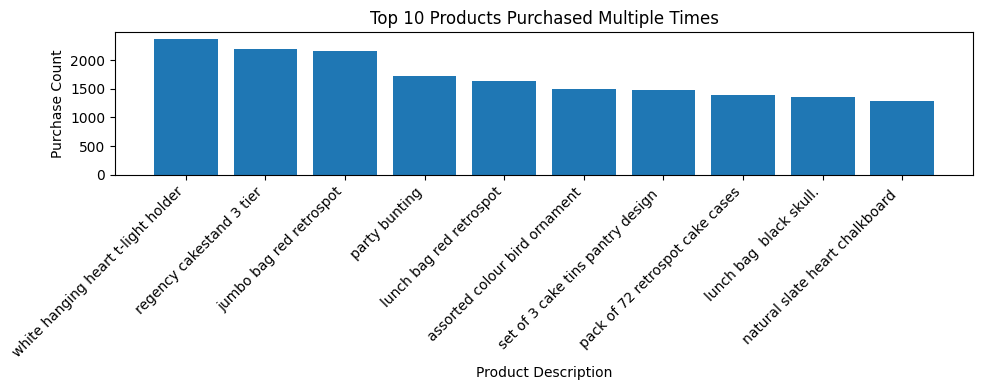

In [16]:
# Create a bar plot for the top 10 products purchased

plt.figure(figsize=(10, 4))
plt.bar(top_10_products['Description'], top_10_products['PurchaseCount'])
plt.xlabel('Product Description')
plt.ylabel('Purchase Count')
plt.title('Top 10 Products Purchased Multiple Times')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [60]:
# from above plot,it shows that household product purchased more

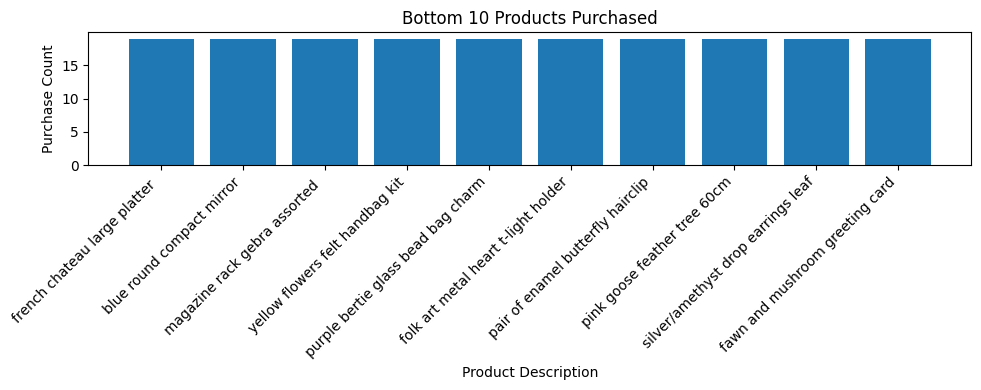

In [42]:
#Now we will see which products purchased less and plot in bar chart

multi_purchase_products = product_count[product_count['PurchaseCount'] < 20]
multi_purchase_products

# Sort the products by purchase count in descending order and take the bottom 10
bottom_10_products = multi_purchase_products.sort_values(by='PurchaseCount', ascending=False).head(10)

# Create a bar plot for the bottom 10 products purchased

plt.figure(figsize=(10, 4))
plt.bar(bottom_10_products['Description'], bottom_10_products['PurchaseCount'])
plt.xlabel('Product Description')
plt.ylabel('Purchase Count')
plt.title('Bottom 10 Products Purchased')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

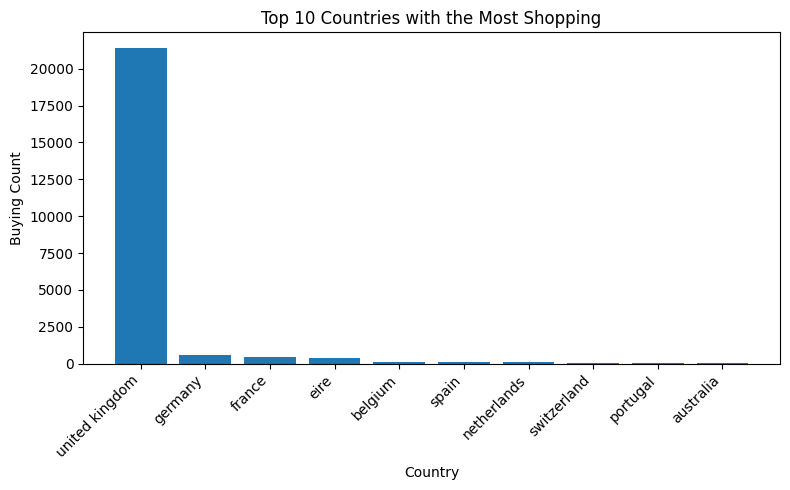

In [18]:
# Now wee will check in which countries shopping done more (Top 10 countries)

# Calculate the total shopping count for each country
country_shopping_count = df.groupby('Country')['InvoiceNo'].nunique().reset_index()
country_shopping_count.columns = ['Country', 'BuyingCount']

#Sort the countries by shopping count in descending order 
top_10_countries = country_shopping_count.sort_values(by = 'BuyingCount', ascending=False).head(10)

# Create a bar plot for the top 10 countries
plt.figure(figsize=(8, 5))
plt.bar(top_10_countries['Country'], top_10_countries['BuyingCount'])
plt.xlabel('Country')
plt.ylabel('Buying Count')
plt.title('Top 10 Countries with the Most Shopping')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
#According to total transactions occured i.e with the help of invoice number we come to know that most of online purchasing done in UK

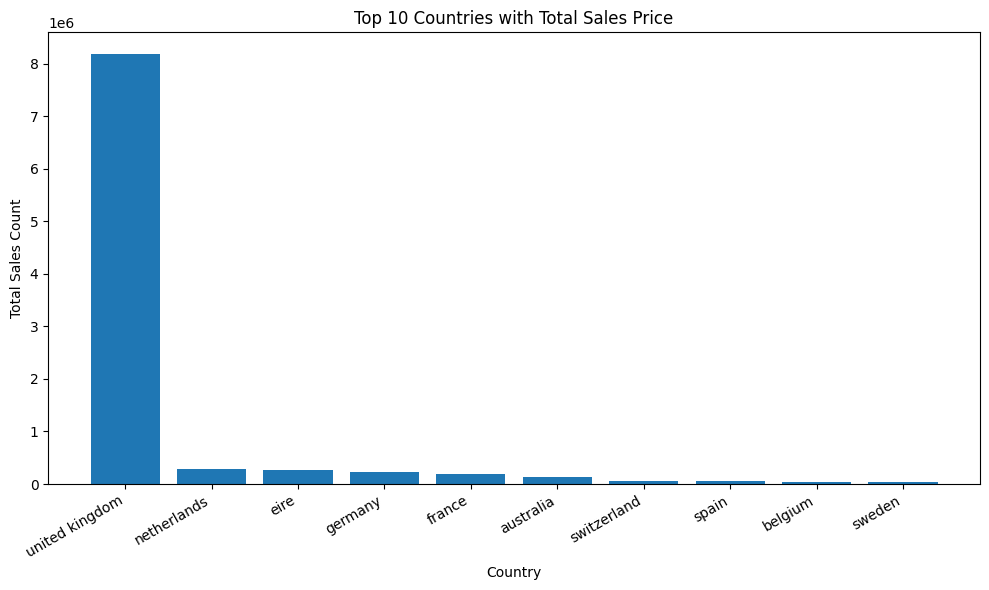

In [21]:
# will check sales amount for top 10 countries

sales_count = df.groupby('Country')['TotalPrice'].sum().reset_index()
sales_count.columns = ['Country', 'TotalSales']

#Sort the countries by sales amount in descending order 
top_10_countries = sales_count.sort_values(by = 'TotalSales', ascending=False).head(10)

# Create a bar plot for the top 10 countries
plt.figure(figsize=(10,6))
plt.bar(top_10_countries['Country'], top_10_countries['TotalSales'])
plt.xlabel('Country')
plt.ylabel('Total Sales Count')
plt.title('Top 10 Countries with Total Sales Price')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

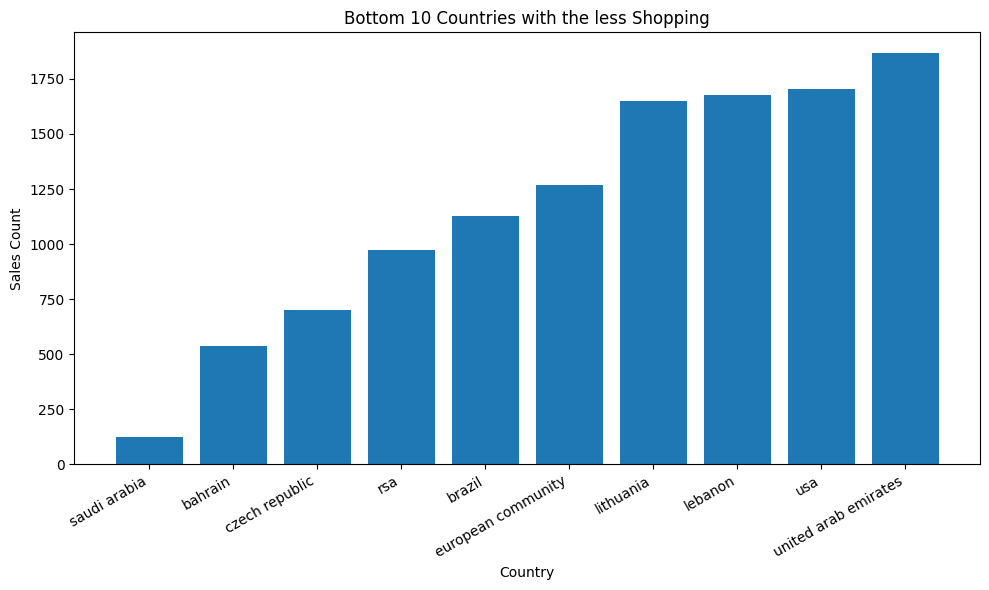

In [43]:
# will check sales amount for Bottom 10 countries

sales_count = df.groupby('Country')['TotalPrice'].sum().reset_index()
sales_count.columns = ['Country', 'TotalSales']

#Sort the countries by sales amount in ascending order 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                bottom_10_countries = sales_count.sort_values(by = 'TotalSales', ascending=True).head(10)

# Create a bar plot for the Bottom 10 countries
plt.figure(figsize=(10,6))
plt.bar(bottom_10_countries['Country'], bottom_10_countries['TotalSales'])
plt.xlabel('Country')
plt.ylabel('Sales Count')
plt.title('Bottom 10 Countries with the less Shopping')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
#Now we have to understand whe sales was more, compairing period

In [32]:
#will check InvoiceDate column is in date formate or not
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#next we will extract Year and month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

#next we will calculate sales for each month & year
sales_by_period = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
sales_by_period_column = ['YearMonth','TotalPrice']

#next we will sort periods by total sales in ascending oreder
period_with_high_sales = sales_by_period.sort_values(by='TotalPrice',ascending=False).iloc[0]

# Display the period with the highest sales
print(f"Period with Highest Sales: {period_with_high_sales['YearMonth']} (Total Sales: {period_with_high_sales['TotalPrice']})")

Period with Highest Sales: 2011-11 (Total Sales: 1461756.25)


In [33]:
# so it shows that shopping done more in Niv 2011 i.e before christmas so home decor products purhchased more 

In [37]:
#i am goint to change TotalPrice column data type from float to int so it will help me to plot graph

# Convert the "TotalPrice" column from float to integer
df['TotalPrice'] = df['TotalPrice'].astype(int)
print(df)

       InvoiceNo StockCode                          Description  Quantity   
0         536365    85123a   white hanging heart t-light holder         6  \
1         536365     71053                  white metal lantern         6   
2         536365    84406b       cream cupid hearts coat hanger         8   
3         536365    84029g  knitted union flag hot water bottle         6   
4         536365    84029e       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
539389    581587     22613          pack of 20 spaceboy napkins        12   
539390    581587     22899         children's apron dolly girl          6   
539391    581587     23254        childrens cutlery dolly girl          4   
539392    581587     23255      childrens cutlery circus parade         4   
539393    581587     22138        baking set 9 piece retrospot          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539394 entries, 0 to 539393
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539394 non-null  object        
 1   StockCode    539394 non-null  object        
 2   Description  539394 non-null  object        
 3   Quantity     539394 non-null  int64         
 4   InvoiceDate  539394 non-null  datetime64[ns]
 5   UnitPrice    539394 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      539394 non-null  object        
 8   TotalPrice   539394 non-null  int32         
 9   YearMonth    539394 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4), period[M](1)
memory usage: 39.1+ MB


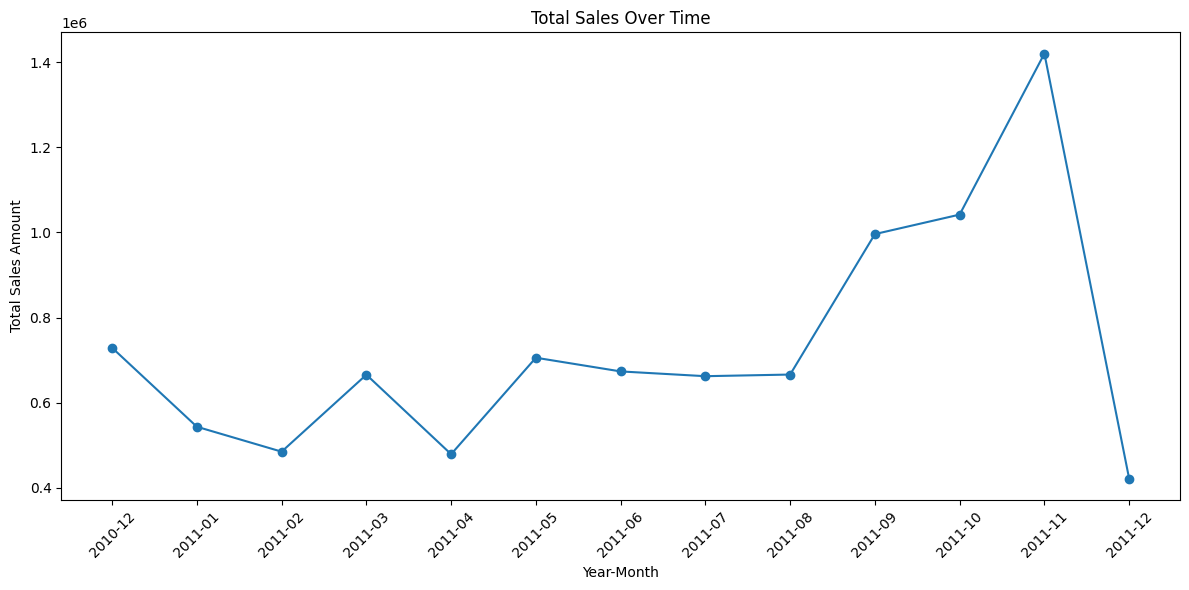

In [41]:
#Now we will show it in graph

#will check InvoiceDate column is in date formate or not
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#next we will extract Year and month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

#next we will calculate sales for each month & year
sales_by_period = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
sales_by_period_column = ['YearMonth','TotalPrice']


# Convert the 'YearMonth' column to string for plotting
sales_by_period['YearMonth'] = sales_by_period['YearMonth'].astype(str)


# Create a line plot to visualize total sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_period['YearMonth'], sales_by_period['TotalPrice'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()